# 1. k-means 클러스터

In [1]:
import pandas as pd
df = pd.read_csv("cpu.csv")
df[:5]

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,class
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [2]:
print(df.values)

[[  125   256  6000 ...    16   128   198]
 [   29  8000 32000 ...     8    32   269]
 [   29  8000 32000 ...     8    32   220]
 ...
 [  125  2000  8000 ...     2    14    52]
 [  480   512  8000 ...     0     0    67]
 [  480  1000  4000 ...     0     0    45]]


In [3]:
print(df.values[:, :-1])

[[  125   256  6000   256    16   128]
 [   29  8000 32000    32     8    32]
 [   29  8000 32000    32     8    32]
 ...
 [  125  2000  8000     0     2    14]
 [  480   512  8000    32     0     0]
 [  480  1000  4000     0     0     0]]


In [4]:
a=1
b=2
print("{} {}".format(a, b))

1 2


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("cluster2.csv")
print(df.shape) # (1300, 2) 는 2차원 데이터가 1300개 있다는 의미.

(1300, 2)


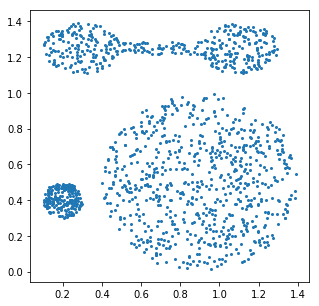

In [25]:
X = df.values
# X[:5]

plt.figure(figsize=(5, 5))

plt.scatter(X[:, 0], X[:, 1], s=4)

plt.show()

In [7]:
cmap = "tab10"
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=4,
                random_state=0)
k_means # kmeans object를 생성한 것이다.

y_pred = k_means.fit_predict(X)
print(y_pred[:10])

[0 0 3 3 0 3 3 0 3 0]


In [8]:
print(k_means.cluster_centers_)

[[1.01379946 1.15444051]
 [1.03377029 0.43895496]
 [0.37933677 0.43852558]
 [0.34274065 1.2515179 ]]


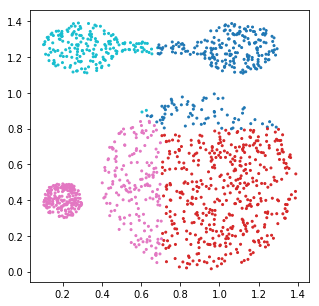

In [9]:
plt.figure(figsize=(5, 5))

plt.scatter(X[:, 0], X[:, 1], c=y_pred , cmap=cmap, s=4)

plt.show()

# 2.계층 클러스터

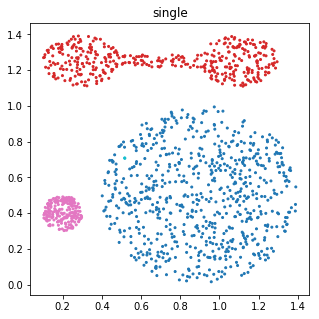

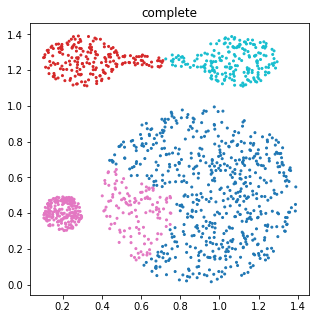

In [10]:
from sklearn.cluster import AgglomerativeClustering
for i, linkage in enumerate(('single', 'complete')):
    clustering = AgglomerativeClustering(
        linkage=linkage, n_clusters=4)
    y_pred = clustering.fit_predict(X)
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred , cmap=cmap, s=4)
    plt.title(linkage)
plt.show()

distance를 single, complete, average, ward 를 사용하고
각 distance에 대해 cluster 개수를 2부터 4까지 변경하면서 클러스터링 하고
각 결과를 visulationzaiotn 하는 코드 작성하기

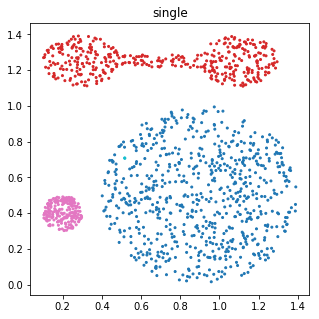

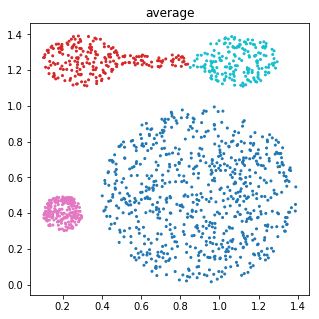

In [11]:
from sklearn.cluster import AgglomerativeClustering
for i, linkage in enumerate(('single', 'average')):
    clustering = AgglomerativeClustering(
        linkage=linkage, n_clusters=4)
    y_pred = clustering.fit_predict(X)
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred , cmap=cmap, s=4)
    plt.title(linkage)
plt.show()

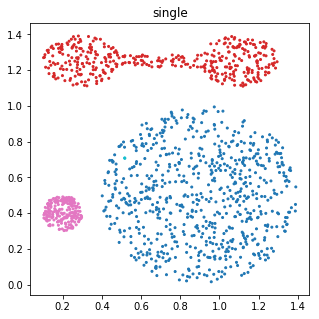

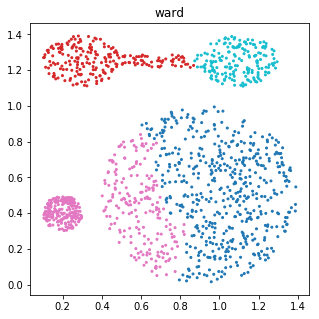

In [12]:
from sklearn.cluster import AgglomerativeClustering
for i, linkage in enumerate(('single', 'ward')):
    clustering = AgglomerativeClustering(
        linkage=linkage, n_clusters=4)
    y_pred = clustering.fit_predict(X)
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred , cmap=cmap, s=4)
    plt.title(linkage)
plt.show()

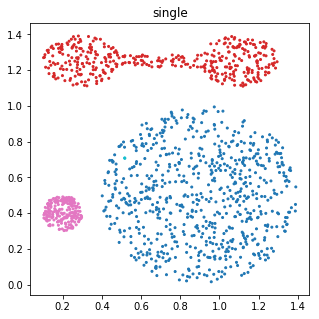

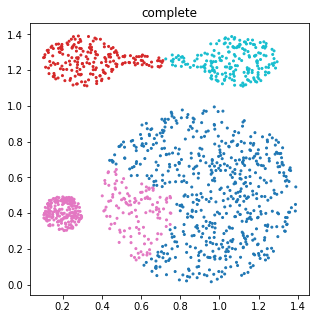

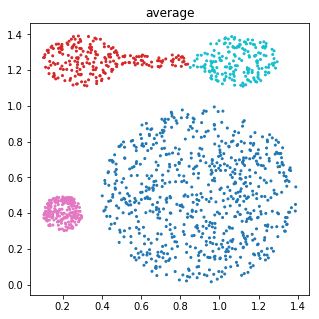

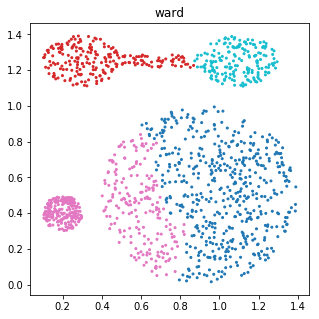

In [13]:
from sklearn.cluster import AgglomerativeClustering
for i, linkage in enumerate(('single', 'complete', 'average','ward' )):
    clustering = AgglomerativeClustering(
        linkage=linkage, n_clusters=4)
    y_pred = clustering.fit_predict(X)
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred , cmap=cmap, s=4)
    plt.title(linkage)
plt.show()

In [14]:
for i, linkage in enumerate(('single', 'complete', 'average','ward' )):
    print(i)
    print(linkage)

0
single
1
complete
2
average
3
ward


# 3. DBSCAN 알고리즘

weka 에 설치해야 하는 것이 있다.
tools 에서 dbscan 검색 후 install


In [22]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=20)
y_pred = dbscan.fit_predict(X)
print(y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


In [16]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=20)
y_pred = dbscan.fit_predict(X)
print(y_pred[:10])

[ 0  4 -1 -1 -1 -1 -1 -1 -1 -1]


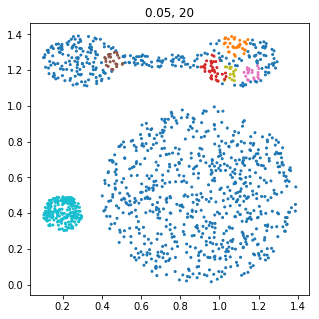

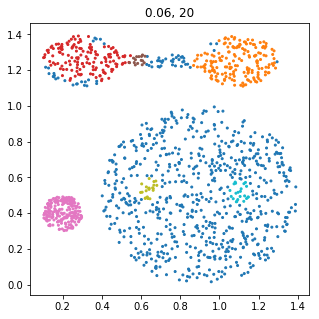

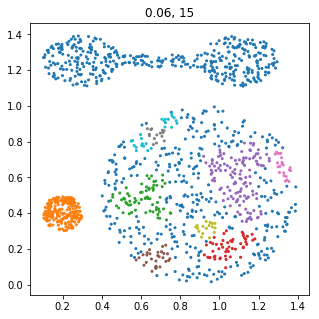

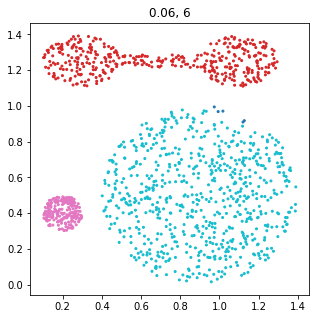

In [17]:
for i, (eps, min_samples) in enumerate(
    ((0.05, 20), (0.06, 20), (0.06, 15), (0.06, 6))):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    y_pred = dbscan.fit_predict(X)
    plt.figure(figsize=(5, 5))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred , cmap=cmap, s=4)
    plt.title(f'{eps}, {min_samples}')
plt.show()

# 4. EM clustering

[0.06504542 0.0026261  0.0122968  0.01240278]
[0.06504542 0.0026261  0.0122968  0.01240278]


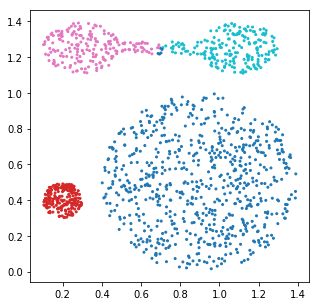

In [44]:
from sklearn.mixture import GaussianMixture
em = GaussianMixture(n_components=4, max_iter=20, random_state=0, covariance_type='spherical')
y_pred = em.fit_predict(X)
full = em.covariances_
print(full)
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='tab10', s=4)
print(em.covariances_)
plt.show()
# covariance_type=('full','tied','diag','spherical'))

# 4. PLSI

# 5. 프로젝트 관련